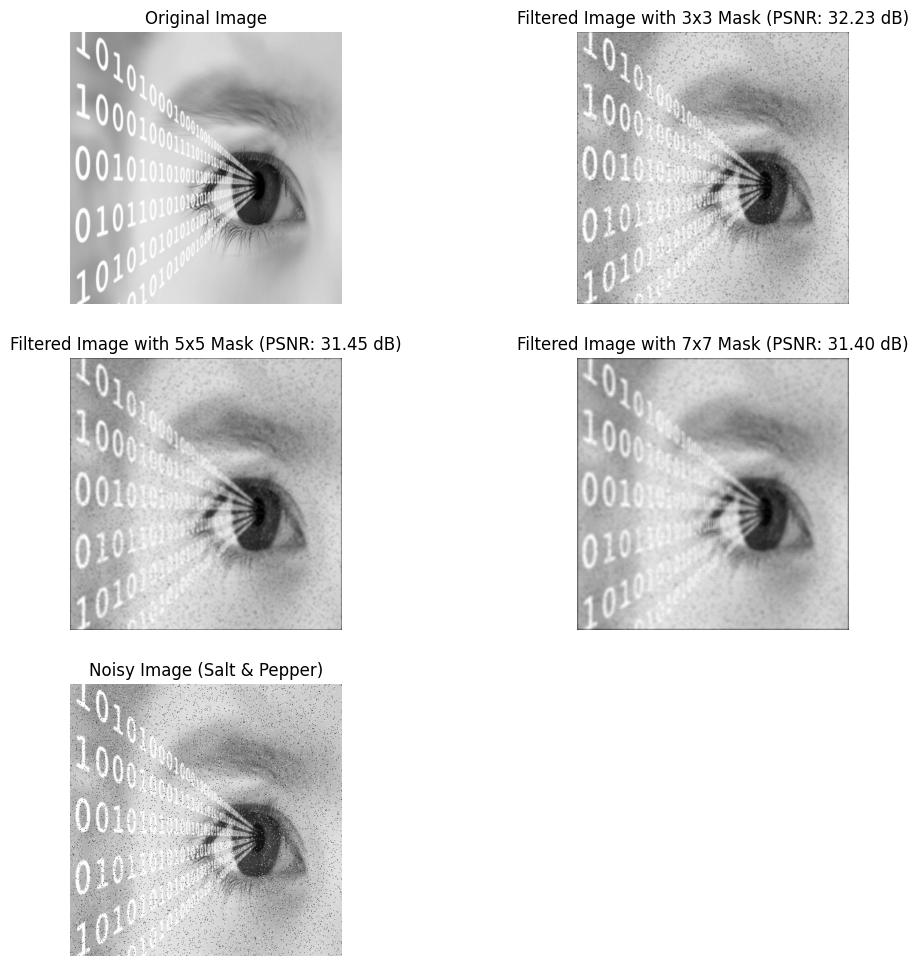

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, prob):
    """
    Add salt and pepper noise to an image.
    :param image: Input grayscale image.
    :param prob: Probability of noise.
    :return: Noisy image.
    """
    noisy = image.copy()
    total_pixels = image.size
    num_salt = int(prob * total_pixels / 2)
    num_pepper = int(prob * total_pixels / 2)

    # Add salt
    coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    # Add pepper
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

def apply_average_filter(image, kernel_size):
    """
    Apply average filter to the image.
    For each pixel, take the average of the surrounding pixels.
    Return: Filtered image.
    """
    padSize = kernel_size // 2
    paddedImage = np.pad(image, (padSize, padSize), mode='constant')

    filteredImage = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernelRegion = paddedImage[i: i+kernel_size, j: j+kernel_size]
            average = np.mean(kernelRegion)
            filteredImage[i, j] = average
    
    return filteredImage

def calculate_psnr(original, denoised):
    """
    Calculate PSNR between two images.  (Peak Signal-to-Noise Ratio)
    :param original: Original image.
    :param denoised: Denoised image.
    :return: PSNR value.
    :Mean Squared Error (MSE)
    """
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse))



# Load a 512x512 grayscale image
image_path = "img.jpg"  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    raise ValueError("Could not load the image. Please check the file path.")

# Resize image if not 512x512
if original_image.shape != (512, 512):
    original_image = cv2.resize(original_image, (512, 512), interpolation=cv2.INTER_AREA)

# Add salt and pepper noise
noise_probability = 0.05  # 5% noise
noisy_image = add_salt_and_pepper_noise(original_image, noise_probability)

# Mask sizes to evaluate
mask_sizes = [3, 5, 7]

# Store PSNR results
psnr_results = {}

plt.figure(figsize=(12, 12))

# Display original image
plt.subplot(3, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Apply filters with different mask sizes and calculate PSNR
for mask_size in mask_sizes:
    filtered_image = apply_average_filter(noisy_image, mask_size)
    psnr = calculate_psnr(original_image, filtered_image)
    psnr_results[mask_size] = psnr

    # Display results for each mask size
    
    plt.subplot(3, 2, mask_sizes.index(mask_size) + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image with {mask_size}x{mask_size} Mask (PSNR: {psnr:.2f} dB)')
    plt.axis('off')

# Display noisy image
plt.subplot(3, 2, 5)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt & Pepper)')
plt.axis('off')
plt.show()
